In [3]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [143]:
gen_quant = CmdStanModel(stan_file = "Lab_3.stan")

In [144]:
samples = gen_quant.sample(fixed_param = True, iter_sampling = 1000, iter_warmup = 0, chains = 1)

17:07:10 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

17:07:10 - cmdstanpy - INFO - CmdStan done processing.


In [145]:
df = samples.draws_pd()
df

,lp__,accept_stat__,N,y,p
0,0.0,0.0,50.0,9.0,0.206450
1,0.0,0.0,50.0,1.0,0.081579
2,0.0,0.0,50.0,8.0,0.175263
3,0.0,0.0,50.0,23.0,0.556105
4,0.0,0.0,50.0,6.0,0.082957
...,...,...,...,...,...
995,0.0,0.0,50.0,3.0,0.095155
996,0.0,0.0,50.0,5.0,0.089770
997,0.0,0.0,50.0,8.0,0.170061
998,0.0,0.0,50.0,7.0,0.146827


In [146]:
#p_samples = samples.stan_variable("p")
y_samples = samples.stan_variable("y")

In [147]:
allergic_reaction_ratio = y_samples / 50

Text(0, 0.5, 'Count')

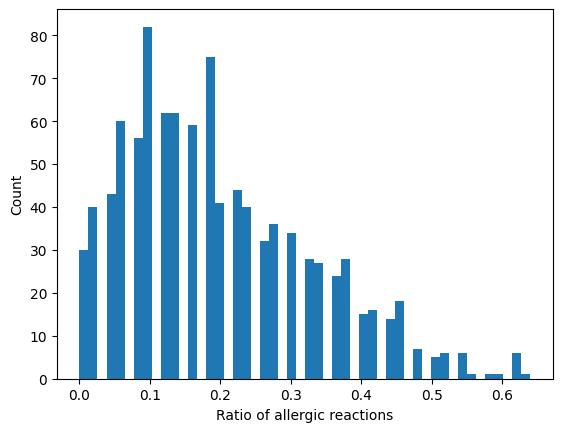

In [148]:
plt.hist(allergic_reaction_ratio,bins=50)
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Count')

In [149]:
mean_ratio = allergic_reaction_ratio.mean()
mean_ratio

0.19684000000000004

In [76]:
# as it is visible Prior value was predicted almost the same as mean_ratio analyzed above

In [73]:
gen_quant_1 = CmdStanModel(stan_file = "Lab_3_1.stan")

In [74]:
samples_1 =  gen_quant_1.sample(data={'N':50, 'y':7},fixed_param = True, iter_sampling = 1000, iter_warmup = 0, chains = 1)

00:26:29 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

00:26:29 - cmdstanpy - INFO - CmdStan done processing.


In [75]:
df_1 = samples_1.draws_pd()
df_1

,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.228861,15.0
1,0.0,0.0,0.228861,10.0
2,0.0,0.0,0.228861,14.0
3,0.0,0.0,0.228861,9.0
4,0.0,0.0,0.228861,9.0
...,...,...,...,...
995,0.0,0.0,0.228861,9.0
996,0.0,0.0,0.228861,12.0
997,0.0,0.0,0.228861,6.0
998,0.0,0.0,0.228861,16.0


In [76]:
y_pred_samples = samples_1.stan_variable("y_pred")

In [77]:
allergic_reaction_ratio_1 = y_pred_samples / 50

Text(0, 0.5, 'Count')

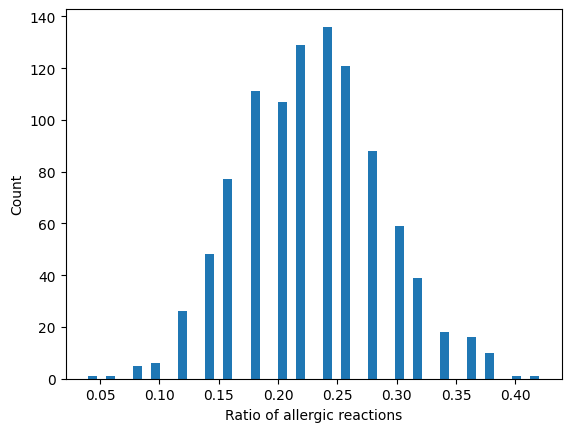

In [78]:
plt.hist(allergic_reaction_ratio_1, bins=50)
plt.xlabel('Ratio of allergic reactions')
plt.ylabel('Count')

In [79]:
mean_ratio_1 = allergic_reaction_ratio_1.mean()
mean_ratio_1

0.22844000000000006

In [80]:
#compute expected value and 94% density interval od the predicted ratio 
ratio_ci = az.from_dict(posterior={'p':df_1.p, 'ratio': allergic_reaction_ratio_1})
#print(ratio_ci)
p  = az.summary(ratio_ci, var_names='p', hdi_prob=0.94,round_to=3)
allergic_rate = az.summary(ratio_ci, var_names='ratio', hdi_prob=0.94, round_to=3)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


In [81]:
print(p)

    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
p  0.229  0.0   0.229    0.229        0.0      0.0    1000.0    1000.0    NaN


In [82]:
print(allergic_rate)

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
ratio  0.228  0.059    0.12     0.32      0.002    0.001   981.695   786.722   

       r_hat  
ratio    NaN  


In [83]:
trad_p = 0.2
ratio_count = (allergic_reaction_ratio_1 < trad_p).sum()
ratio_prob = ratio_count/len(allergic_reaction_ratio_1)
print('Probability that ratio is lower than traditional vaccines: {:.2f}%'.format(ratio_prob*100))

Probability that ratio is lower than traditional vaccines: 27.50%
